# Setting

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lettura dataset

In [178]:
df = pd.read_csv("data/framingham.csv")
df.head()

OSError: [Errno 22] Invalid argument: 'data/framingham.csv'

# Esplorazione

## Caratteristiche principali

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe(include='all')

## Verifica duplicati

In [ ]:
sum(df.duplicated())

# non ci sono duplicati

## Verifica missing values

In [ ]:
df.isnull().sum()

# ci sono diversi missing values

In [ ]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

In [ ]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

# la maggior parte dei misssing values sono per la variabile glucose

In [ ]:
df.isnull().sum().sum()/len(df)  # rivedere meglio

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

In [ ]:
df[df.isna().any(axis=1)]


# I understand that most of the variables with missing numbers are related to medical records and it is better not to impute this type of information.

## Distribuzione variabili

In [ ]:
df.hist(figsize=(15,18))
plt.show()

In [ ]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# e simili
# https://medium.com/swlh/the-framingham-heart-study-decision-trees-83a7fb62718e

In [ ]:
# Checking for outliers
# df.describe()
# sns.pairplot(df)

In [ ]:
# considero la variabile target

df.TenYearCHD.value_counts()

## Analisi correlazione

In [ ]:
# Calcolo della correlazione
df.corr()


# Visualizzazione della correlazione
# sns.heatmap(df.corr())
#
# f, ax = plt.subplots(figsize=(20,15))
#
# sns.heatmap(df.corr(), annot=True);


# the propensity of developing heart disease is a result of a conjunction of factors.

# Pre processing

## Gestione missing values

In [ ]:
# Dropping all rows with missing data

# As all the variables with missing values have less than 25% of missing information, it will not be considered deleting the whole column but only the rows that contain missing information. I understand that most of the variables with missing numbers are related to medical records and it is better not to impute this type of information.

df_clean = df.dropna()
df_clean.isna().sum()

## Gestione feature

In [179]:
# rendere dummies alcune variabili categoriche
feature_names = ['male', 'education', 'currentSmoker', 'BPMeds',
                 'prevalentStroke', 'prevalentHyp', 'diabetes']

X = df_clean.drop(['TenYearCHD'], axis = 1)
X = pd.get_dummies(X, columns=feature_names)

y = df_clean.TenYearCHD
# X
# è aumentato il numero di collone, 9 feature in più si hanno

# Feature selection: Decision tree

## Divisione train test

 capire se fare prima o dopo class imbalance

In [148]:
from sklearn.model_selection import train_test_split

# clarify what is y and what is x label
# y = df_clean['TenYearCHD']
# X = df_clean.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [150]:
X_train

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0,male_1,...,currentSmoker_0,currentSmoker_1,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
2517,60,0.0,280.0,114.0,82.0,23.96,70.0,84.0,0,1,...,1,0,1,0,1,0,1,0,1,0
4134,46,20.0,247.0,134.0,96.0,32.47,80.0,72.0,0,1,...,0,1,1,0,1,0,1,0,1,0
3165,44,30.0,363.0,140.0,87.0,26.44,95.0,79.0,0,1,...,0,1,1,0,1,0,1,0,1,0
4137,42,0.0,238.0,118.0,80.0,33.19,75.0,76.0,1,0,...,1,0,1,0,1,0,1,0,1,0
3443,61,0.0,194.0,148.0,89.0,23.48,100.0,101.0,1,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,40,0.0,175.0,173.0,59.0,27.99,70.0,75.0,0,1,...,1,0,1,0,1,0,0,1,1,0
1552,46,20.0,182.0,117.0,78.0,22.15,72.0,59.0,1,0,...,0,1,1,0,1,0,1,0,1,0
4015,38,0.0,159.0,108.0,72.0,27.68,70.0,84.0,1,0,...,1,0,1,0,1,0,1,0,1,0
3995,41,15.0,200.0,118.0,87.0,21.28,73.0,71.0,0,1,...,0,1,1,0,1,0,1,0,1,0


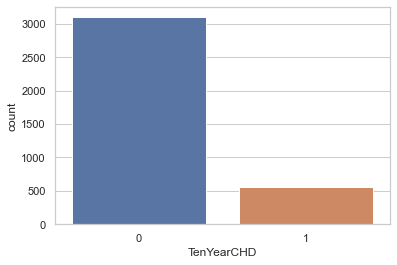

In [151]:
ax = sns.countplot(x=y)

## Gestione class imbalance

Class 0: 3099
Class 1: 557
Proportion: 5.56 : 1


D:\Anaconda\envs\env_fisica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


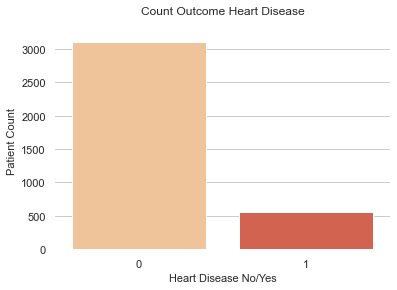

In [152]:
# Checking balance of outcome variable
target_count = df_clean.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_clean.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.show()

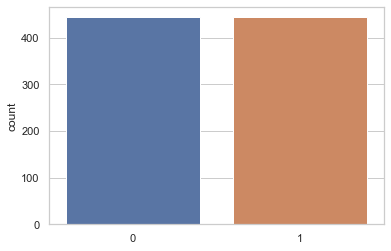

In [153]:
# The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class. -> UNDERSAMPLING

# Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.
# Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

# A number of more sophisticated resampling techniques have been proposed in the scientific literature.
# Let’s apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

# alcune tecnicnhe:
# RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.

# NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.


# https://hersanyagci.medium.com/under-sampling-methods-for-imbalanced-data-clustercentroids-randomundersampler-nearmiss-eae0eadcc145
# da fare solo sul train
from imblearn.under_sampling import NearMiss
nr = NearMiss(version=3)

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())  # mentre il test non lo tocco, ora X_train_miss e y_train_miss sono i miei nuovi Train
ax = sns.countplot(x=y_train_miss)

X_train_miss = pd.DataFrame(X_train_miss)
y_train_miss = pd.DataFrame(y_train_miss)
y_train_miss.rename(columns={0: 'TenYearCHD'}, inplace=True)

In [154]:
# train: X_train_miss, y_train_miss è stato ribilanciato
# test: X_test, y_test è rimasto così

In [ ]:
# https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [ ]:
# https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
# Embedded Methods

# Feature selection can also be acheived by the insights provided by some Machine Learning models.

# Tree based models calculates feature importance for they need to keep the best performing features as close to the root of the tree. Constructing a decision tree involves calculating the best predictive feature.

In [ ]:
# test 1

# embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
# embeded_rf_selector.fit(X, y)
#
# embeded_rf_support = embeded_rf_selector.get_support()
# embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
# print(str(len(embeded_rf_feature)), 'selected features')
# embeded_rf_feature

In [ ]:
# test 2
# https://www.youtube.com/watch?v=7v4Qdm5v9aA

## Fit del modello

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from dtreeviz.trees import dtreeviz

dct = DecisionTreeClassifier(max_depth=3)  # qui stabiliamo la profondità, ?l'albero viene quindi trocnato a questa profondità
dct.fit(X_train_miss, y_train_miss)

DecisionTreeClassifier(max_depth=3)

## Performance

High-Dimensionality Score: 0.5956284153005464


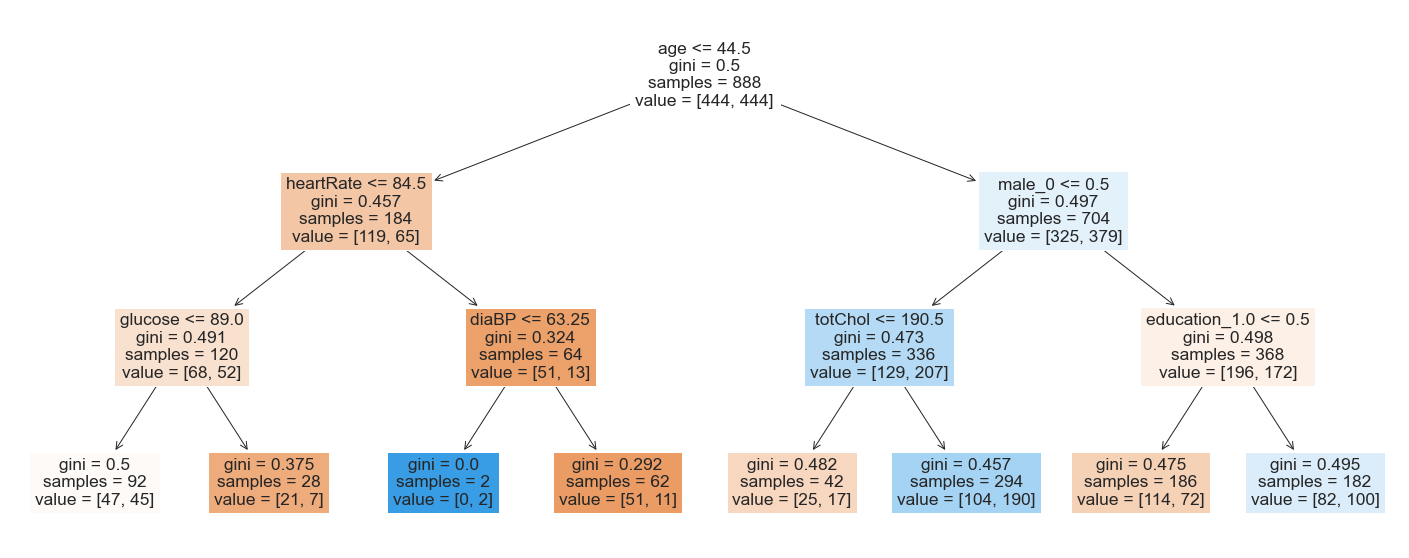

In [160]:
score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", score)



fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dct,
                   feature_names=X.columns,
                   filled=True
                   #,max_depth=4
                   )
plt.show()

# se una feature dal nodo padre al nodo figlio causa una grande riduzione dell'impurità allora è una feature importante

# le feature che non compaiono nell'albero non sono importanti evidentemente

In [161]:
dct.feature_importances_

array([0.27460768, 0.        , 0.117772  , 0.        , 0.07203795,
       0.        , 0.12154809, 0.06745233, 0.21334523, 0.        ,
       0.13323673, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [162]:
# le feature più importanti

for importance, name in sorted(zip(dct.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)

age 0.2746076758446892
male_0 0.21334522544757173
education_1.0 0.13323672767251468
heartRate 0.12154809002849365
totChol 0.11777199736565998
diaBP 0.07203794990236165
glucose 0.06745233373870929
sysBP 0.0
prevalentStroke_1 0.0
prevalentStroke_0 0.0
prevalentHyp_1 0.0
prevalentHyp_0 0.0
male_1 0.0
education_4.0 0.0
education_3.0 0.0
education_2.0 0.0
diabetes_1 0.0
diabetes_0 0.0
currentSmoker_1 0.0
currentSmoker_0 0.0
cigsPerDay 0.0
BPMeds_1.0 0.0
BPMeds_0.0 0.0
BMI 0.0


Text(0, 0.5, 'Feature Importance')

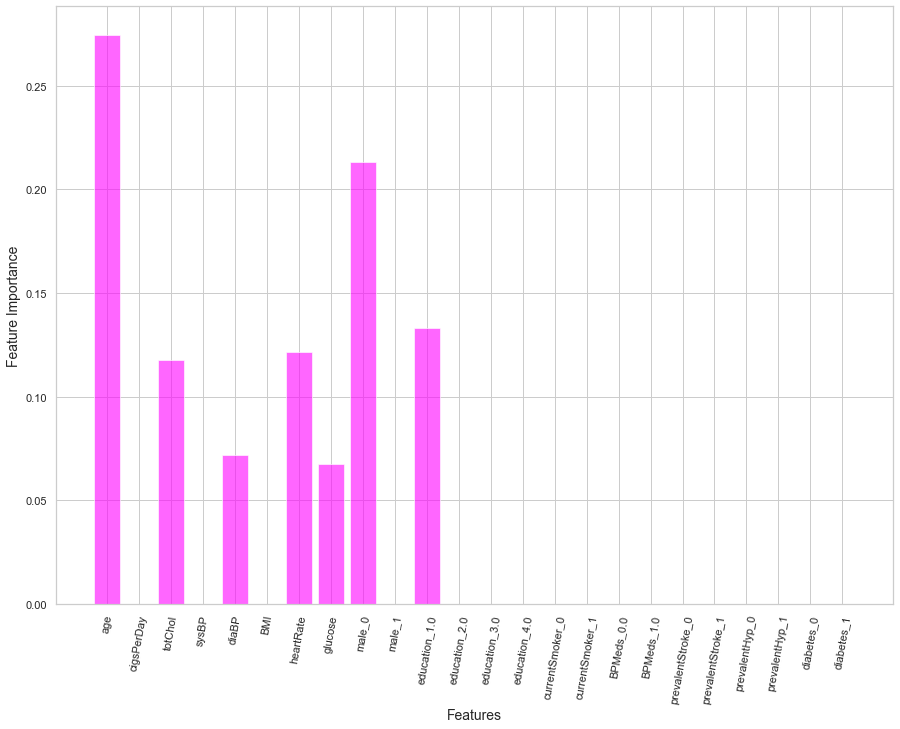

In [163]:
import numpy as np
# features = df_clean.drop(['TenYearCHD'], axis=1)
col_names_list_new = list(X.columns.values)
n_features = len(col_names_list_new)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), dct.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), col_names_list_new, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)

D:\Anaconda\envs\env_fisica\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


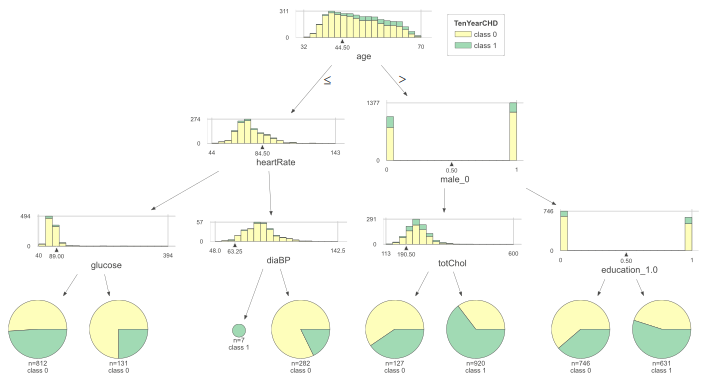

In [164]:
viz = dtreeviz(dct, X, y,
               target_name='TenYearCHD',
               feature_names=list(X.columns))

viz

## Salvataggio albero

# Fetaure selection: Boosted Decision Tree

In [ ]:
# What is a boosted decision tree?
# Boosting means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it. Thus, boosting in a decision tree ensemble tends to improve accuracy with some small risk of less coverage.


# # da lezioni
#
# import xgboost as xgb
#
# feature_names = list(X.columns)
#
# train = xgb.DMatrix(data=X_train,
#                     label=y_train.Label.cat.codes,
#                     missing=-999.0,
#                     feature_names=feature_names)
#
# test = xgb.DMatrix(data=X_test,
#                    label=y_test.Label.cat.codes,
#                    missing=-999.0,
#                    feature_names=feature_names)
#
# param = {}
#
# # Booster parameters
# param['eta']              = 0.1 # learning rate
# param['max_depth']        = 10  # maximum depth of a tree
# param['subsample']        = 0.8 # fraction of events to train tree on
# param['colsample_bytree'] = 0.8 # fraction of features to train tree on
#
# # Learning task parameters
# param['objective']   = 'binary:logistic' # objective function
# param['eval_metric'] = 'error'           # evaluation metric for cross validation
# param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]
#
# num_trees = 100  # number of trees to make
#
#
# booster = xgb.train(param, train, num_boost_round=num_trees)
#
# predictions = booster.predict(test)
#
# # plot all predictions (both signal and background)
# plt.hist(predictions, bins=np.linspace(0,1,50), histtype='step', color='darkgreen', label='All events')
#
# plt.xlabel('Prediction from BDT', fontsize=12)
# plt.ylabel('Events', fontsize=12)
# plt.legend(frameon=False)
# plt.show()
#
# # plot signal and background separately
# plt.hist(predictions[test.get_label().astype(bool)], bins=np.linspace(0,1,50),
#          histtype='step', color='midnightblue', label='signal')
# plt.hist(predictions[~(test.get_label().astype(bool))], bins=np.linspace(0,1,50),
#          histtype='step', color='firebrick', label='background')
#
# plt.xlabel('Prediction from BDT',fontsize=12)
# plt.ylabel('Events',fontsize=12)
# plt.legend(frameon=False)
# plt.show()
#
# xgb.plot_importance(booster, grid=False);
# plt



In [93]:
# d = data_train.copy()
#
# d['prediction'] = np.around(booster.predict(train)).astype('int64')
# d['prediction'] = d['prediction'].map({1: 's', 0: 'b'})
#
# d[['prediction', 'Label']]
#
# right = d.loc[d['prediction'] == d['Label']]
# wrong = d.loc[d['prediction'] != d['Label']]
#
# true_positive = right.loc[right['prediction'] == 's']
# false_positive = wrong.loc[wrong['prediction'] == 's']
# false_negative = wrong.loc[wrong['prediction'] == 'b']
#
# print("We had %d elements in our recordset." % len(d))
# print("We classified correctly %d events." % len(right))
# print("We classified wrongly %d events." % len(wrong))
# print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))
#
# print("")
#
# print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
# print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))
#
#
# # vedi anche notebook lab soluzioni

In [94]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import Decisio
#
# embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
# embeded_rf_selector.fit(X, y)
#
# embeded_rf_support = embeded_rf_selector.get_support()
# embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
# print(str(len(embeded_rf_feature)), 'selected features')

# Previsione: Logistic Regression

## Selezione feature individuate

In [165]:
# variabili da conisderare
feature_names = ['age', 'totChol', 'diaBP', 'heartRate', 'glucose', 'male_0', 'education_1.0']

# creo nuovo df solo con variabili selezionate
X = X[feature_names]
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

## Divisione train test

In [166]:
# del train vecchio seleziono solo le variabili che ci interessano
# ci sta anche ripartire dal dataset e fare operazioni e poi divide in train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

## Scaling

In [167]:
# per la logistic regression è necessario scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X = scaler.fit_transform(X)

# eventualmente da fare dopo split
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Gestione class imbalance

In [168]:
# gestione class imbalance
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())

## Fit del modello

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression().fit(X_train_miss, y_train_miss)

## Previsioni

In [170]:
pred = mod.predict(X_test)

## Performance

In [171]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 60.9%
The f1 score for LogReg is: 32.5%
The precision score for LogReg is: 22.2%
The recall score for LogReg is: 61.1%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

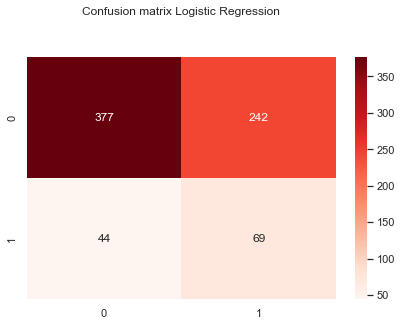

In [172]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)